<img src="https://raw.githubusercontent.com/retkowsky/images/master/logo%20azure%20cog%20svcs.jpg">

Documentation : https://azure.microsoft.com/en-us/services/cognitive-services/

In [24]:
import sys
sys.version

'3.6.9 |Anaconda, Inc.| (default, Jul 30 2019, 19:07:31) \n[GCC 7.3.0]'

In [25]:
import datetime
now = datetime.datetime.now()
print(now)

2020-07-07 13:52:20.079772


# Face API Sexe et Age

In [26]:
subscription_key = "AREMPLACER"
assert subscription_key

Next, verify `face_api_url` and make sure it corresponds to the region you used when generating the subscription key. If you are using a trial key, you don't need to make any changes.

In [27]:
face_api_url = 'https://westeurope.api.cognitive.microsoft.com/face/v1.0/detect'

Here is the URL of the image. You can experiment with different images  by changing ``image_url`` to point to a different image and rerunning this notebook.

In [28]:
image_url = 'https://raw.githubusercontent.com/retkowsky/images/master/face1.jpeg'

The next few lines of code call into the Face API to detect the faces in the image. In this instance, the image is specified via a publically visible URL. You can also pass an image directly as part of the request body. For more information, see the [API reference](https://westus.dev.cognitive.microsoft.com/docs/services/563879b61984550e40cbbe8d/operations/563879b61984550f30395236). 

In [29]:
import requests
from IPython.display import HTML

headers = { 'Ocp-Apim-Subscription-Key': subscription_key }
    
params = {
    'returnFaceId': 'true',
    'returnFaceLandmarks': 'false',
    'returnFaceAttributes': 'age,gender,headPose,smile,facialHair,glasses,emotion,hair,makeup,occlusion,accessories,blur,exposure,noise',
}

response = requests.post(face_api_url, params=params, headers=headers, json={"url": image_url})
faces = response.json()
HTML("<font size=5>Detected <font color='blue'>%d</font> faces in the image</font>"%len(faces))

Finally, the face information can be overlaid of the original image using the `matplotlib` library in Python.

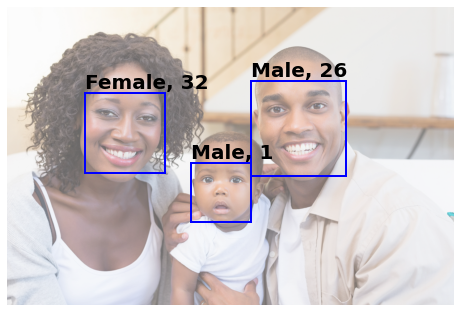

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt

from PIL import Image
from matplotlib import patches
from io import BytesIO

response = requests.get(image_url)
image = Image.open(BytesIO(response.content))

plt.figure(figsize=(8,8))
ax = plt.imshow(image, alpha=0.6)
for face in faces:
    fr = face["faceRectangle"]
    fa = face["faceAttributes"]
    origin = (fr["left"], fr["top"])
    p = patches.Rectangle(origin, fr["width"], fr["height"], fill=False, linewidth=2, color='b')
    ax.axes.add_patch(p)
    plt.text(origin[0], origin[1], "%s, %d"%(fa["gender"].capitalize(), fa["age"]), fontsize=20, weight="bold", va="bottom")
_ = plt.axis("off")

Here are more images that can be analyzed using the same technique.
First, define a helper function, ``annotate_image`` to annotate an image given its URL by calling into the Face API.

In [31]:
def annotate_image(image_url):
    response = requests.post(face_api_url, params=params, headers=headers, json={"url": image_url})
    faces = response.json()

    image_file = BytesIO(requests.get(image_url).content)
    image = Image.open(image_file)

    plt.figure(figsize=(8,8))
    ax = plt.imshow(image, alpha=0.6)
    for face in faces:
        fr = face["faceRectangle"]
        fa = face["faceAttributes"]
        origin = (fr["left"], fr["top"])
        p = patches.Rectangle(origin, fr["width"], \
                              fr["height"], fill=False, linewidth=2, color='b')
        ax.axes.add_patch(p)
        plt.text(origin[0], origin[1], "%s, %d"%(fa["gender"].capitalize(), fa["age"]), \
                 fontsize=10, weight="bold", va="bottom")
    plt.axis("off")

You can then call ``annotate_image`` on other images. A few examples samples are shown below.

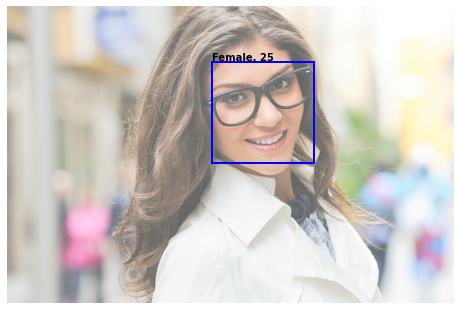

In [32]:
annotate_image("https://raw.githubusercontent.com/retkowsky/images/master/face2.jpeg")

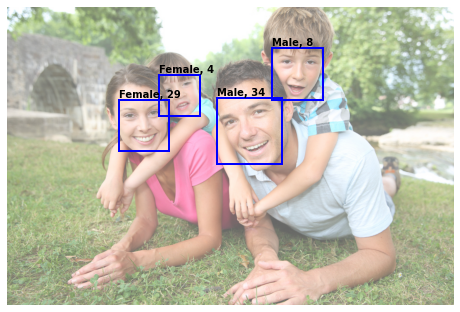

In [33]:
annotate_image("https://raw.githubusercontent.com/retkowsky/images/master/face3.jpeg")

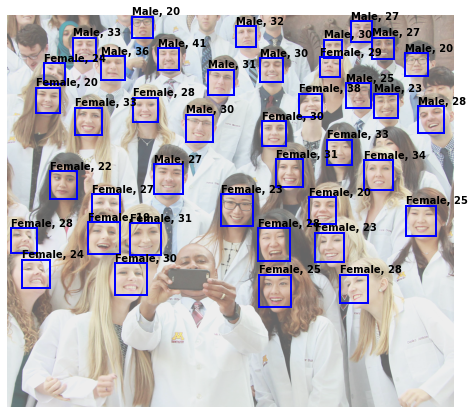

In [34]:
annotate_image("https://raw.githubusercontent.com/retkowsky/images/master/face4.jpeg")

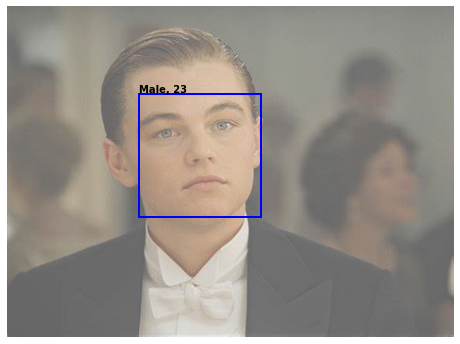

In [35]:
annotate_image("https://th.bing.com/th/id/OIP.VSkSjH7UNvbn7NEPj-AhywHaFf?pid=Api&rs=1")